(DQM)=
# Introducción al modelo Discrete Quadratic Model
```{index} Discrte Quadratic Model, DQM, offset
```

En módulos anteriores hemos estado desarrollando modelos donde la variables $ x_i $ erán dicotómicas, y en concreto para los problemas tipo QUBO podían tener valores 0 ó 1. En este apartado vamos a ampliar ese modelo a variables que puedan tomar valores discretos. La formulación matemática de estos modelos, se representa mediante la siguiente ecuación genérica:

$$ H(d)=\sum_{i}a_{i}(d_{i})+\sum_{i,j}b_{i,j}(d_{i},d_{j})+c $$

Donde $d_i$ son las variables discretas, tanto $a_i()$ como $b_{i,j}()$ son funciones de valores  reales y c es una constante, también denominada *offset*.

Entonces este tipo de problemas los podemos trasladar a problemas de tipo QUBO transformado las variables $d_i$ a otras variables de tipo binario que sólo toman valores 0 ó 1 mediante el método denominado <a href="https://en.wikipedia.org/wiki/One-hot" target="_blank"> one-hot encoding </a>. Este método consiste en los siguiente: supongamos que tenemos un modelo DQM con N variables discretas, $d_i$, y cada una de esta variables discretas puede tener $n_i$ valores diferentes, entonces definimos la variable binaria (con valores 0 ó 1) $x_{i,u}$ con valor 1 cuando para uno de los valores de $d_i$ y cero en el resto de los casos, y además y por construcción se debe cumplir que 

$$ \sum_{u=0}^{n_{i}-1}x_{i,u}=1\:\forall i=1,2,...N $$

En estos casos la función objetivo se podría expresar de la siguiente manera:

$$ E(X)=\sum_{i=1}^{n}\sum_{u=1}^{n_{i}}a_{i,u}x_{i,u}+\sum_{i=1}^{N}\sum_{j=i+1}^{N}\sum_{u=1}^{n_{i}}\sum_{j=1}^{n_{j}}b_{i,j,u,v}x_{i,u}x_{j,v}+c $$

Esta última expresión es la que se emplea en las herramientas de Ocean para resolver este tipo de problemas. Para entender mejor este concepto, vamos a ver un ejemplo concreto. Supongamos que tenemos tres contenedores y 10 objetos que queremos introducir en esos contenedores. En este caso la variable $d_i$ valdría 1,2,3 indicando al contenedor que elegimos para el objeto i. Ahora definimos la variable dicotómica que puede tomar valores 0 ó 1 siguiente:

$$x_{i,j}=\begin{cases}
1 & Si\ objeto\ j\ est\acute{a}\ en\ contendor\ i\\
0 & en\ caso\ contrario
\end{cases} $$

Entonces en este caso, como cada objeto j debe estar en un solo contendor, se debe cumplir que $\sum_{i=1}^{3}x_{ij}=1\ \forall j=1,2,..,10$,$

De esta manera si por ejemplo el producto 5 se decide que está en el contenedor 1, se tiene que $x_{1,5}=1$ y $x_{i,5}=0$ para i=2,3

Para un correcto uso de estas herramientas, se aconseja al lector mirar los siguientes enlaces:

* Documentación de la clase <a href="https://docs.ocean.dwavesys.com/en/stable/docs_dimod/reference/models.html#dimod.DiscreteQuadraticModel" target="_blank"> dimod.DiscreteQuadraticModel </a>

* Documentación de la clase <a href="https://docs.ocean.dwavesys.com/en/stable/docs_system/reference/samplers.html#dwave.system.samplers.LeapHybridDQMSampler" target="_blank"> LeapHybridDQMSampler </a>.

A continuación se procede a mostrar una serie de ejemplos que ayudan a comprender cómo utilizar esta clase.

(MapColoring)=
## Ejemplo 1. Map Coloring.
```{index} Problema Map Coloring
```

Este es uno de los ejemplos típicos de utilización de Ocean. Se trata de los siguiente: Dado un mapa (en este caso el de Estados Unidos), y cuatro colores, se pretende utilizar estos cuatro colores para colorear todos los Estados, pero de tal manera que dos Estados adyacentes no pueden tener el mismo color.

Para poder resolver este problema, una de las cosas que debemos tener es información de para cada Estado, los que son adyacentes al mismo. Esta información <a href="https://writeonly.wordpress.com/2009/03/20/adjacency-list-of-states-of-the-united-states-us/" target="_blank"> la obtenemos de este enlace </a>. Cogiendo los datos que alli se pueden ver, se ha construido el fichero denominado *usa.adj* el cual nos va a servir para contruir la red base para reolver el problema.

A continuación se muestra un ejemplo del contenido de este fichero:

```{admonition} Ejemplo del contenido del fichero usa.adj# Author Gregg Lind
# License:  Public Domain.    I would love to hear about any projects you use if it for though!
 
AK,HI
AL,MS,TN,GA,FL
AR,MO,TN,MS,LA,TX,OK
AZ,CA,NV,UT,CO,NM
CA,OR,NV,AZ
CO,WY,NE,KS,OK,NM,AZ,UT
CT,NY,MA,RI
DC,MD,VA
DE,MD,PA,NJ
FL,AL,GA
GA,FL,AL,TN,NC
,SC
HI,AKt
```

Así pues con la información anterior, procedemos a leer el fichero y construir los nodos y los arcos de la red con la que vamos a trabajar para resolver el problema planteado.

In [2]:
import networkx as nx
# Leemos el ficheros
G = nx.read_adjlist('datos/usa.adj', delimiter = ',')   

In [3]:
# Veamos los nodos de la red
G.nodes()

NodeView(('', 'AK', 'HI', 'AL', 'MS', 'TN', 'GA', 'FL', 'AR', 'MO', 'LA', 'TX', 'OK', 'AZ', 'CA', 'NV', 'UT', 'CO', 'NM', 'OR', 'WY', 'NE', 'KS', 'CT', 'NY', 'MA', 'RI', 'DC', 'MD', 'VA', 'DE', 'PA', 'NJ', 'NC', 'SC', 'IA', 'MN', 'WI', 'IL', 'SD', 'ID', 'MT', 'WA', 'IN', 'KY', 'MI', 'OH', 'WV', 'NH', 'VT', 'ME', 'ND'))

In [4]:
#Sacamos los arcos de la red
G.edges()

EdgeView([('AK', 'HI'), ('AL', 'MS'), ('AL', 'TN'), ('AL', 'GA'), ('AL', 'FL'), ('MS', 'AR'), ('MS', 'LA'), ('MS', 'TN'), ('TN', 'AR'), ('TN', 'GA'), ('TN', 'KY'), ('TN', 'MO'), ('TN', 'NC'), ('TN', 'VA'), ('GA', 'FL'), ('GA', 'NC'), ('GA', 'SC'), ('AR', 'MO'), ('AR', 'LA'), ('AR', 'TX'), ('AR', 'OK'), ('MO', 'IA'), ('MO', 'IL'), ('MO', 'KS'), ('MO', 'KY'), ('MO', 'OK'), ('MO', 'NE'), ('LA', 'TX'), ('TX', 'NM'), ('TX', 'OK'), ('OK', 'CO'), ('OK', 'KS'), ('OK', 'NM'), ('AZ', 'CA'), ('AZ', 'NV'), ('AZ', 'UT'), ('AZ', 'CO'), ('AZ', 'NM'), ('CA', 'OR'), ('CA', 'NV'), ('NV', 'ID'), ('NV', 'UT'), ('NV', 'OR'), ('UT', 'CO'), ('UT', 'ID'), ('UT', 'NM'), ('UT', 'WY'), ('CO', 'WY'), ('CO', 'NE'), ('CO', 'KS'), ('CO', 'NM'), ('OR', 'ID'), ('OR', 'WA'), ('WY', 'ID'), ('WY', 'MT'), ('WY', 'NE'), ('WY', 'SD'), ('NE', 'IA'), ('NE', 'KS'), ('NE', 'SD'), ('CT', 'NY'), ('CT', 'MA'), ('CT', 'RI'), ('NY', 'MA'), ('NY', 'NJ'), ('NY', 'PA'), ('NY', 'VT'), ('MA', 'RI'), ('MA', 'NH'), ('MA', 'VT'), ('DC', 'MD

Para tener un trabajo más cómodo y más descriptivo, procedemos a denominar a los nodos por *states* y a los arcos por *borders*.

In [5]:

states = G.nodes        
borders = G.edges       

Ahora ya tenemos todos los ingredientes para construir el modelo que resuelva el problema planteado. Los pasos son los que damos en el código que sigue y para una mejor comprensión del mismo a continuación detallamos los pasos que se dan:

1.- Se definen los cuatro colores con los que se va a colorear el mapa. Estos colores son genéricos y los identificamos con los números: 0,1,2,3.

2.- Se procede a crear una instancia de * DiscreteQuadraticModel()*

3. Dado que cualquier Estado del mapa  se puede colorear con uno de los cuatro colores, se representa cada estado con una variable discreta que puede tener cuatro casos (las variables binarias pueden tener dos valores; las variables discretas pueden tener algún número arbitrario de casos).

4. Para cada par de Estados que comparten frontera, establezca un sesgo cuadrático (denominado bias) de 1 
 entre los casos idénticos de las variables  de 0 
 entre todos los casos diferentes (por defecto, el sesgo cuadrático es cero). Este modelo de penalización añade un valor d1   
 a las soluciones del DQM para cada par de estados vecinos con el mismo co (es decir estamos penalizando los estados que tienen alguna fronmtera en común)lor. Las soluciones óptimas son las que tienen el menor número de estados vecinoslator

In [8]:
import dimod
# Incorporamos los colores que se van a utilizar : 1
colors = [0, 1, 2, 3]
# Obtenemos el objeto DiscreteQuadraticModel(): 2
dqm = dimod.DiscreteQuadraticModel()
# Cada estado se representa con una variable discreta que puede tomar cuatro valores y como etiqueta tiene el nombre del estado correspondiente : 3
for state in states:            
   dqm.add_variable(4, label=state)

# Damos una penalización de 1 para cada par de Estados que tienen alguna frontera en común (estos Estados se localizan 
# por estar en la variables borders ): 4
for state0, state1 in borders:          
   dqm.set_quadratic(state0, state1, {(color, color): 1 for color in colors})

Obtengamos a continuación alguna información del objeto creado. Veremos sólo algunos casos, para ampliar esta información, el lector puede consultar los métodos y propiedades de esta clase en la documetación oficial y obtener más información.

Comenzamos viendo la estructura de adyacencia de las variables

In [9]:
dqm.adj

{'': {}, 'AK': {'H': 'I'}, 'HI': {'A': 'K'}, 'AL': {'M': 'S', 'T': 'N', 'G': 'A', 'F': 'L'}, 'MS': {'A': 'R', 'T': 'N', 'L': 'A'}, 'TN': {'A': 'R', 'M': 'O', 'G': 'A', 'V': 'A', 'N': 'C', 'K': 'Y'}, 'GA': {'A': 'L', 'T': 'N', 'F': 'L', 'N': 'C', 'S': 'C'}, 'FL': {'A': 'L', 'G': 'A'}, 'AR': {'M': 'O', 'T': 'X', 'L': 'A', 'O': 'K'}, 'MO': {'T': 'N', 'A': 'R', 'O': 'K', 'N': 'E', 'K': 'Y', 'I': 'L'}, 'LA': {'M': 'S', 'A': 'R', 'T': 'X'}, 'TX': {'A': 'R', 'L': 'A', 'O': 'K', 'N': 'M'}, 'OK': {'A': 'R', 'M': 'O', 'T': 'X', 'C': 'O', 'N': 'M', 'K': 'S'}, 'AZ': {'C': 'O', 'N': 'M', 'U': 'T'}, 'CA': {'A': 'Z', 'N': 'V', 'O': 'R'}, 'NV': {'A': 'Z', 'C': 'A', 'U': 'T', 'O': 'R', 'I': 'D'}, 'UT': {'A': 'Z', 'N': 'M', 'C': 'O', 'W': 'Y', 'I': 'D'}, 'CO': {'O': 'K', 'A': 'Z', 'U': 'T', 'N': 'E', 'W': 'Y', 'K': 'S'}, 'NM': {'T': 'X', 'O': 'K', 'A': 'Z', 'U': 'T', 'C': 'O'}, 'OR': {'C': 'A', 'N': 'V', 'I': 'D', 'W': 'A'}, 'WY': {'U': 'T', 'C': 'O', 'N': 'E', 'S': 'D', 'I': 'D', 'M': 'T'}, 'NE': {'M':

También podemos consultar el nombre de las variables discretas que se han creado.

In [10]:
dqm.variables

Variables(['', 'AK', 'HI', 'AL', 'MS', 'TN', 'GA', 'FL', 'AR', 'MO', 'LA', 'TX', 'OK', 'AZ', 'CA', 'NV', 'UT', 'CO', 'NM', 'OR', 'WY', 'NE', 'KS', 'CT', 'NY', 'MA', 'RI', 'DC', 'MD', 'VA', 'DE', 'PA', 'NJ', 'NC', 'SC', 'IA', 'MN', 'WI', 'IL', 'SD', 'ID', 'MT', 'WA', 'IN', 'KY', 'MI', 'OH', 'WV', 'NH', 'VT', 'ME', 'ND'])

El servicio de nube cuántica de D-Wave proporciona solucionadores híbridos basados en la nube a los que se pueden enviar BQM y DQM arbitrarios. Estos solucionadores, que implementan algoritmos clásicos de última generación junto con la asignación inteligente de la unidad de procesamiento cuántico (QPU) a las partes del problema donde más se beneficia, están diseñados para dar cabida incluso a problemas muy grandes. Los solucionadores de Leap pueden liberarle de la carga de cualquier desarrollo actual y futuro y de la optimización de los algoritmos híbridos que mejor resuelvan su problema.
Utilizaremos en este caso la clase  <a href="https://docs.ocean.dwavesys.com/en/stable/docs_system/reference/samplers.html#dwave.system.samplers.LeapHybridDQMSampler" target="_blank"> LeapHybridDQMSampler </a> para obtener las soluciones que estamos buscandoor

In [11]:
from dwave.system import LeapHybridDQMSampler
sampleset = LeapHybridDQMSampler().sample_dqm(dqm,
                label='SDK Examples - Map Coloring DQM')  
print("Energy: {}\nSolution: {}".format(
       sampleset.first.energy, sampleset.first.sample))  

Energy: 0.0
Solution: {'': 2, 'AK': 0, 'HI': 1, 'AL': 0, 'MS': 2, 'TN': 1, 'GA': 2, 'FL': 3, 'AR': 0, 'MO': 2, 'LA': 1, 'TX': 3, 'OK': 1, 'AZ': 1, 'CA': 2, 'NV': 0, 'UT': 3, 'CO': 2, 'NM': 0, 'OR': 3, 'WY': 1, 'NE': 3, 'KS': 0, 'CT': 2, 'NY': 1, 'MA': 0, 'RI': 3, 'DC': 3, 'MD': 0, 'VA': 2, 'DE': 1, 'PA': 2, 'NJ': 0, 'NC': 3, 'SC': 1, 'IA': 0, 'MN': 3, 'WI': 2, 'IL': 3, 'SD': 2, 'ID': 2, 'MT': 0, 'WA': 0, 'IN': 2, 'KY': 0, 'MI': 3, 'OH': 1, 'WV': 3, 'NH': 2, 'VT': 3, 'ME': 3, 'ND': 1}


**NOTA**. El valor de energía cero anterior significa que esta primera (mejor) solución encontrada no ha acumulado penalizaciones, lo que significa que no hay pares de estados vecinos con el mismo color.

Procedemos ahora a dibujar la mejor solución encontrada

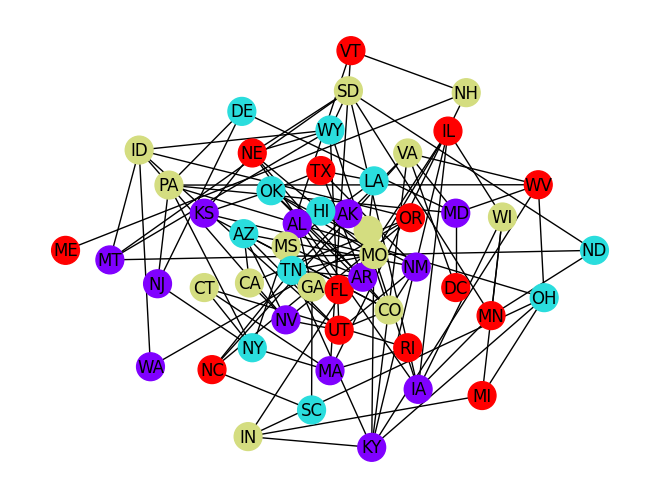

In [14]:
import matplotlib.pyplot as plt       
node_list = [list(G.nodes)[x:x+10] for x in range(0, 52, 10)]   
node_list[4].append('ND')     
nx.draw(G, pos=nx.shell_layout(G, nlist = node_list), with_labels=True,
        node_color=list(sampleset.first.sample.values()), node_size=400,
        cmap=plt.cm.rainbow)                 
plt.show()    